In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

In [2]:
img = image.load_img("D://Destop//HoraphaVSKrapao//HorapaVsKaprao//training//kaprao//20220419_182634.jpg")

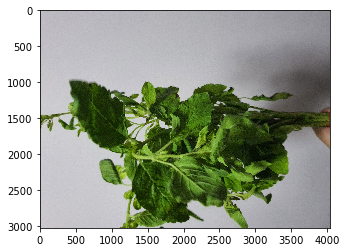

In [3]:
plt.imshow(img)

In [5]:
cv2.imread("D://Destop//HoraphaVSKrapao//HorapaVsKaprao//training//kaprao//20220419_182634.jpg")

array([[[206, 199, 204],
        [206, 199, 204],
        [209, 202, 207],
        ...,
        [196, 200, 194],
        [196, 200, 194],
        [193, 197, 191]],

       [[208, 201, 206],
        [207, 200, 205],
        [208, 201, 206],
        ...,
        [194, 198, 192],
        [194, 198, 192],
        [191, 195, 189]],

       [[210, 203, 208],
        [209, 202, 207],
        [208, 201, 206],
        ...,
        [192, 195, 193],
        [189, 192, 190],
        [185, 188, 186]],

       ...,

       [[133, 127, 128],
        [130, 124, 125],
        [127, 121, 122],
        ...,
        [135, 133, 132],
        [125, 123, 122],
        [121, 119, 118]],

       [[131, 125, 126],
        [131, 125, 126],
        [130, 124, 125],
        ...,
        [144, 142, 141],
        [137, 135, 134],
        [133, 131, 130]],

       [[134, 128, 129],
        [133, 127, 128],
        [134, 128, 129],
        ...,
        [140, 138, 137],
        [136, 134, 133],
        [135, 133, 132]]

In [6]:
train = ImageDataGenerator(rescale= 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [7]:
train_dataset = train.flow_from_directory("D://Destop//HoraphaVSKrapao//HorapaVsKaprao//training",
                                          target_size=(200,200),
                                          batch_size = 3,
                                          class_mode = "binary")
validation_dataset = validation.flow_from_directory("D://Destop//HoraphaVSKrapao//HorapaVsKaprao//validation",
                                                    target_size=(200,200),
                                                    batch_size = 3,
                                                    class_mode = "binary")

Found 535 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [8]:
train_dataset.class_indices

{'horapa': 0, 'kaprao': 1}

In [9]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [11]:
import tensorflow as tf

In [12]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation="relu",input_shape = (200,200,3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(32,(3,3),activation = "relu"),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(64,(3,3),activation = "relu"),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Flatten(),
                                   #
                                   tf.keras.layers.Dense(512,activation="relu"),
                                   #
                                   tf.keras.layers.Dense(1,activation="sigmoid")
                                   ])

In [13]:
model.compile(loss="binary_crossentropy",
               optimizer = RMSprop(lr=0.001),
               metrics = ['accuracy'])

c:\Users\NITRO 5\anaconda3\envs\jy\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [15]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch = 3,
                      epochs = 100,
                      validation_data = validation_dataset
                      )

Epoch 1/100
3/3 [==============================] - 2s 629ms/step - loss: 2.2888 - accuracy: 0.8889
Epoch 2/100
3/3 [==============================] - 2s 599ms/step - loss: 0.0703 - accuracy: 1.0000
Epoch 3/100
3/3 [==============================] - 2s 528ms/step - loss: 0.3365 - accuracy: 0.8889
Epoch 4/100
3/3 [==============================] - 1s 449ms/step - loss: 0.0355 - accuracy: 1.0000
Epoch 5/100
3/3 [==============================] - 1s 454ms/step - loss: 1.1119 - accuracy: 0.7778
Epoch 6/100
3/3 [==============================] - 2s 462ms/step - loss: 0.2172 - accuracy: 0.8889
Epoch 7/100
3/3 [==============================] - 1s 444ms/step - loss: 0.0197 - accuracy: 1.0000
Epoch 8/100
3/3 [==============================] - 2s 504ms/step - loss: 0.0289 - accuracy: 1.0000
Epoch 9/100
3/3 [==============================] - 2s 465ms/step - loss: 0.5819 - accuracy: 0.8889
Epoch 10/100
3/3 [==============================] - 1s 441ms/step - loss: 0.4340 - accuracy: 0.8889
Epoch 11/

In [16]:
validation_dataset.class_indices

{}

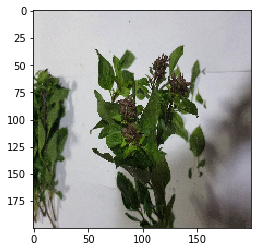

1.horapa.jpg horapa


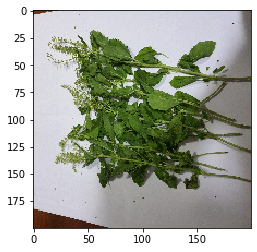

10.kraprao.jpg kaprao


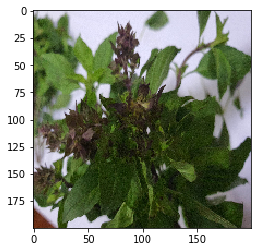

11.horapa.jpg horapa


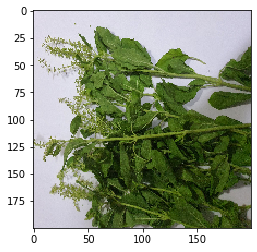

12.kraprao.jpg kaprao


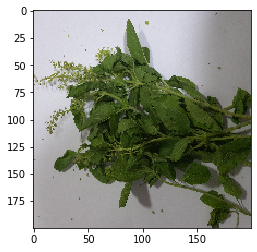

2.kraprao.jpg kaprao


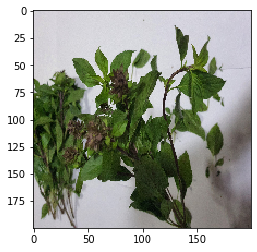

3.horapa.jpg horapa


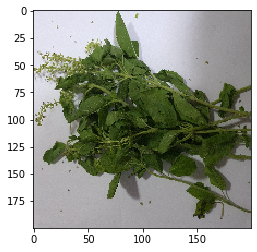

4.kraprao.jpg kaprao


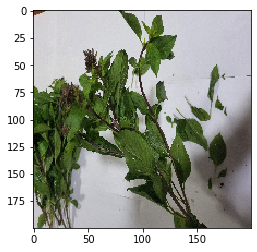

5.horapa.jpg horapa


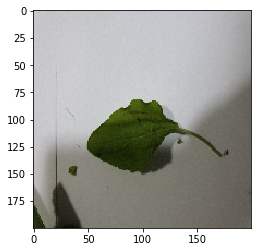

6.kraprao.jpg horapa


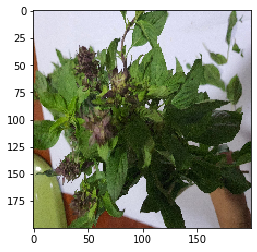

7.horapa.jpg horapa


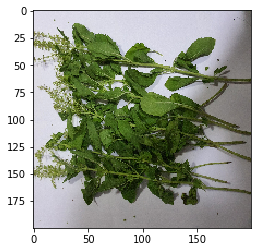

8.kraprao.jpg kaprao


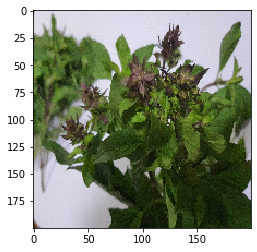

9.horapa.jpg kaprao


In [19]:
dir_path = 'D://Destop//HoraphaVSKrapao//HorapaVsKaprao//testing//testPresision'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path + "//"+ i,target_size=(200,200))
    plt.imshow(img)
    plt.show()

    X = image.img_to_array(img)
    X = np.expand_dims(X,axis=0)
    images = np.vstack([X])
    val = model.predict(images)
    if val == 0:
      print("ชื่อภาพ "i,"AI ตอบว่า horapa")
    else:
      print("ชื่อภาพ "i,"AI ตอบว่า kaprao")